In [1]:
import seaborn as sns
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
)

matplotlib.rc("text", usetex=False)

In [2]:
dros = {
    "cnn": pd.read_csv("../data/dros/cnn.csv"),
    "gcn": pd.read_csv("../data/dros/gnn.csv"),
}
seln = {
    "cnn": pd.read_csv("../data/selection/cnn.csv"),
    "gcn": pd.read_csv("../data/selection/gcn.csv"),
}
demo = {
    "cnn": np.load("../data/demography/cnn_scaled.png.npz"),
    "gcn": np.load("../data/demography/gcn_scaled.png.npz"),
}
recomb = {
    "cnn": np.load("../data/recombination/cnn_scaled.png.npz"),
    "gcn": np.load("../data/recombination/gcn_scaled.png.npz"),
}

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_62965/3733352538.py:14: SyntaxWarning: invalid escape sequence '\i'
  dros_labels = {"ab": "$\it{D. sim}$ → $\it{D. sech}$", "ba": "$\it{D. sech}$ → $\it{D. sim}$", "no": "No introgression"}
/tmp/ipykernel_62965/3733352538.py:14: SyntaxWarning: invalid escape sequence '\i'
  dros_labels = {"ab": "$\it{D. sim}$ → $\it{D. sech}$", "ba": "$\it{D. sech}$ → $\it{D. sim}$", "no": "No introgression"}


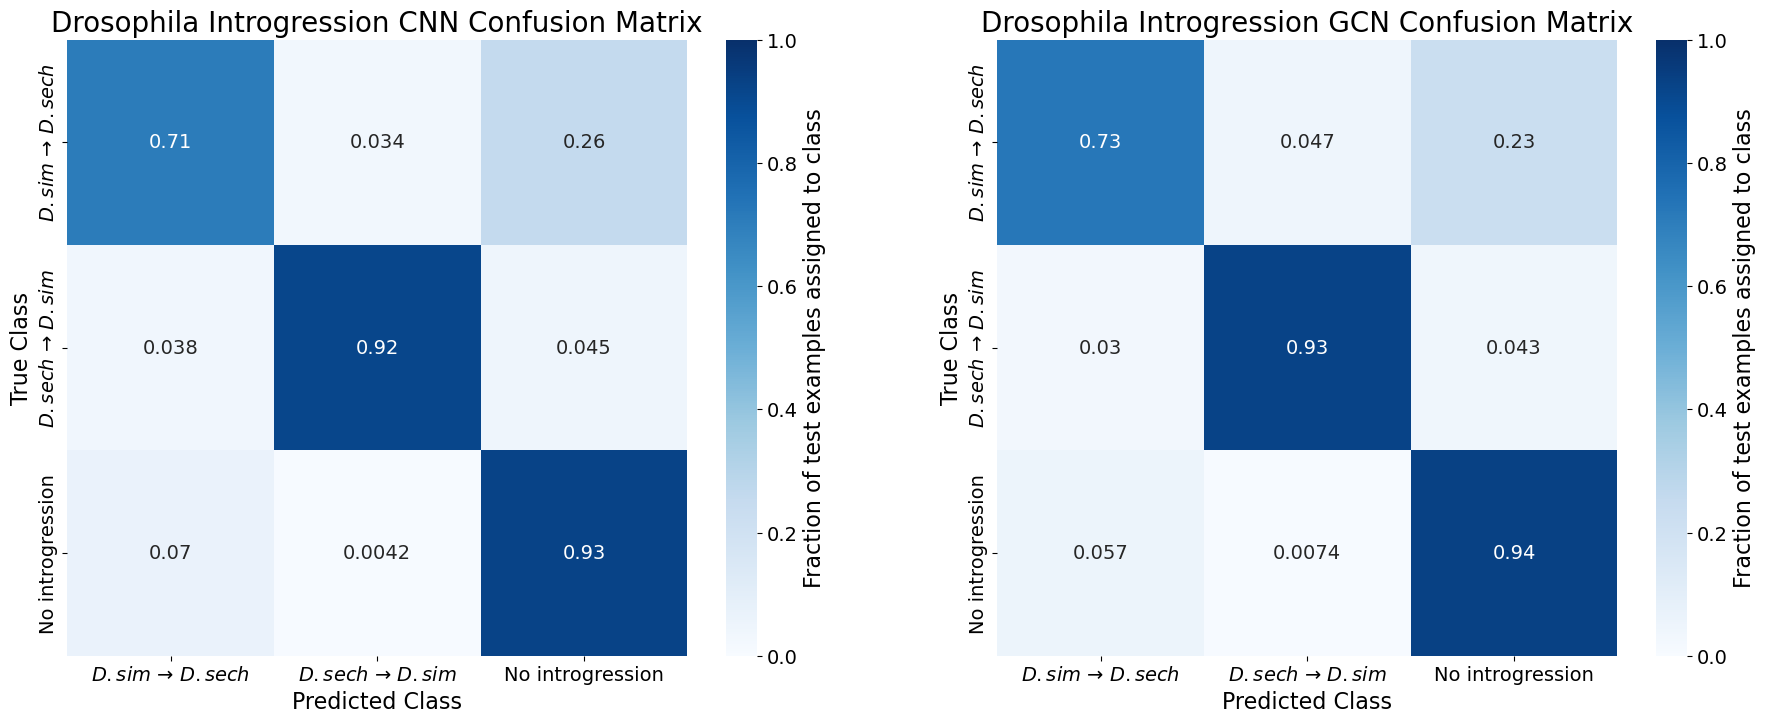

In [4]:
# Drosophila CMs
"""
-Labels can be "sim→sech", "sech→sim" (with sim and sech being italicized for both of these), and "No introgression"

-"True class" and "Predicted class" as axis labels again.

-We can just keep the covfefe with the fractions (same for sweeps fig)

-Also the font sizes need to be increased a fair amount if possible. (same for all figs in the paper I think)

-Also also, I can haz legend.

"""
dros_labels = {
    "ab": "$\it{D. sim}$ → $\it{D. sech}$",
    "ba": "$\it{D. sech}$ → $\it{D. sim}$",
    "no": "No introgression",
}

fig, ax = plt.subplots(1, 2, figsize=(22, 8))
for idx in range(2):
    nn = ["cnn", "gcn"][idx]
    preds = np.argmax(dros[nn].iloc[:, :3], axis=1)
    trues = dros[nn]["y"].values

    confmat = confusion_matrix(trues, preds)
    # sns.heatmap(confmat, annot=True, fmt="d", cmap="Blues", ax=ax[idx, 0], vmin=0, vmax=4000, xticklabels=dros_labels.values(), yticklabels=dros_labels.values())
    # ax[idx, 0].set_ylabel("True Class")
    # ax[idx, 0].set_xlabel("Predicted Class")
    # ax[idx, 0].set_title(f"Drosophila Introgression {nn.upper()} Confusion Matrix")

    normed = confmat / confmat.sum(axis=1)
    sns.heatmap(
        normed,
        annot=True,
        cmap="Blues",
        ax=ax[idx],
        xticklabels=dros_labels.values(),
        yticklabels=dros_labels.values(),
        vmin=0.0,
        vmax=1.0,
        cbar_kws={"label": "Fraction of test examples assigned to class"},
    )
    ax[idx].set_ylabel("True Class")
    ax[idx].set_xlabel("Predicted Class")
    ax[idx].set_title(f"Drosophila Introgression {nn.upper()} Confusion Matrix")

plt.savefig("dros_cm.pdf")
plt.savefig("dros_cm.png", dpi=300)

In [6]:
cnn_intro_probs = np.sum(dros["cnn"].iloc[:, :2].values, axis=1)
gcn_intro_probs = np.sum(dros["gcn"].iloc[:, :2].values, axis=1)

print(cnn_intro_probs.shape)
cnn_intro_labs = dros["cnn"]["y"].values

print(np.unique(cnn_intro_labs))

(12900,)
[0 1 2]


<>:78: SyntaxWarning: invalid escape sequence '\i'
<>:93: SyntaxWarning: invalid escape sequence '\i'
<>:78: SyntaxWarning: invalid escape sequence '\i'
<>:93: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_2315/1904823842.py:78: SyntaxWarning: invalid escape sequence '\i'
  ax[1, 0].set_title("""      Drosophila: Introgression
/tmp/ipykernel_2315/1904823842.py:93: SyntaxWarning: invalid escape sequence '\i'
  ax[1, 1].set_title("""      Drosophila: Introgression


[1 1 1 ... 0 0 0] [4.0719200e-02 5.5712116e-01 9.6168190e-01 ... 4.2354297e-02 3.4915807e-04
 1.0261486e-01]


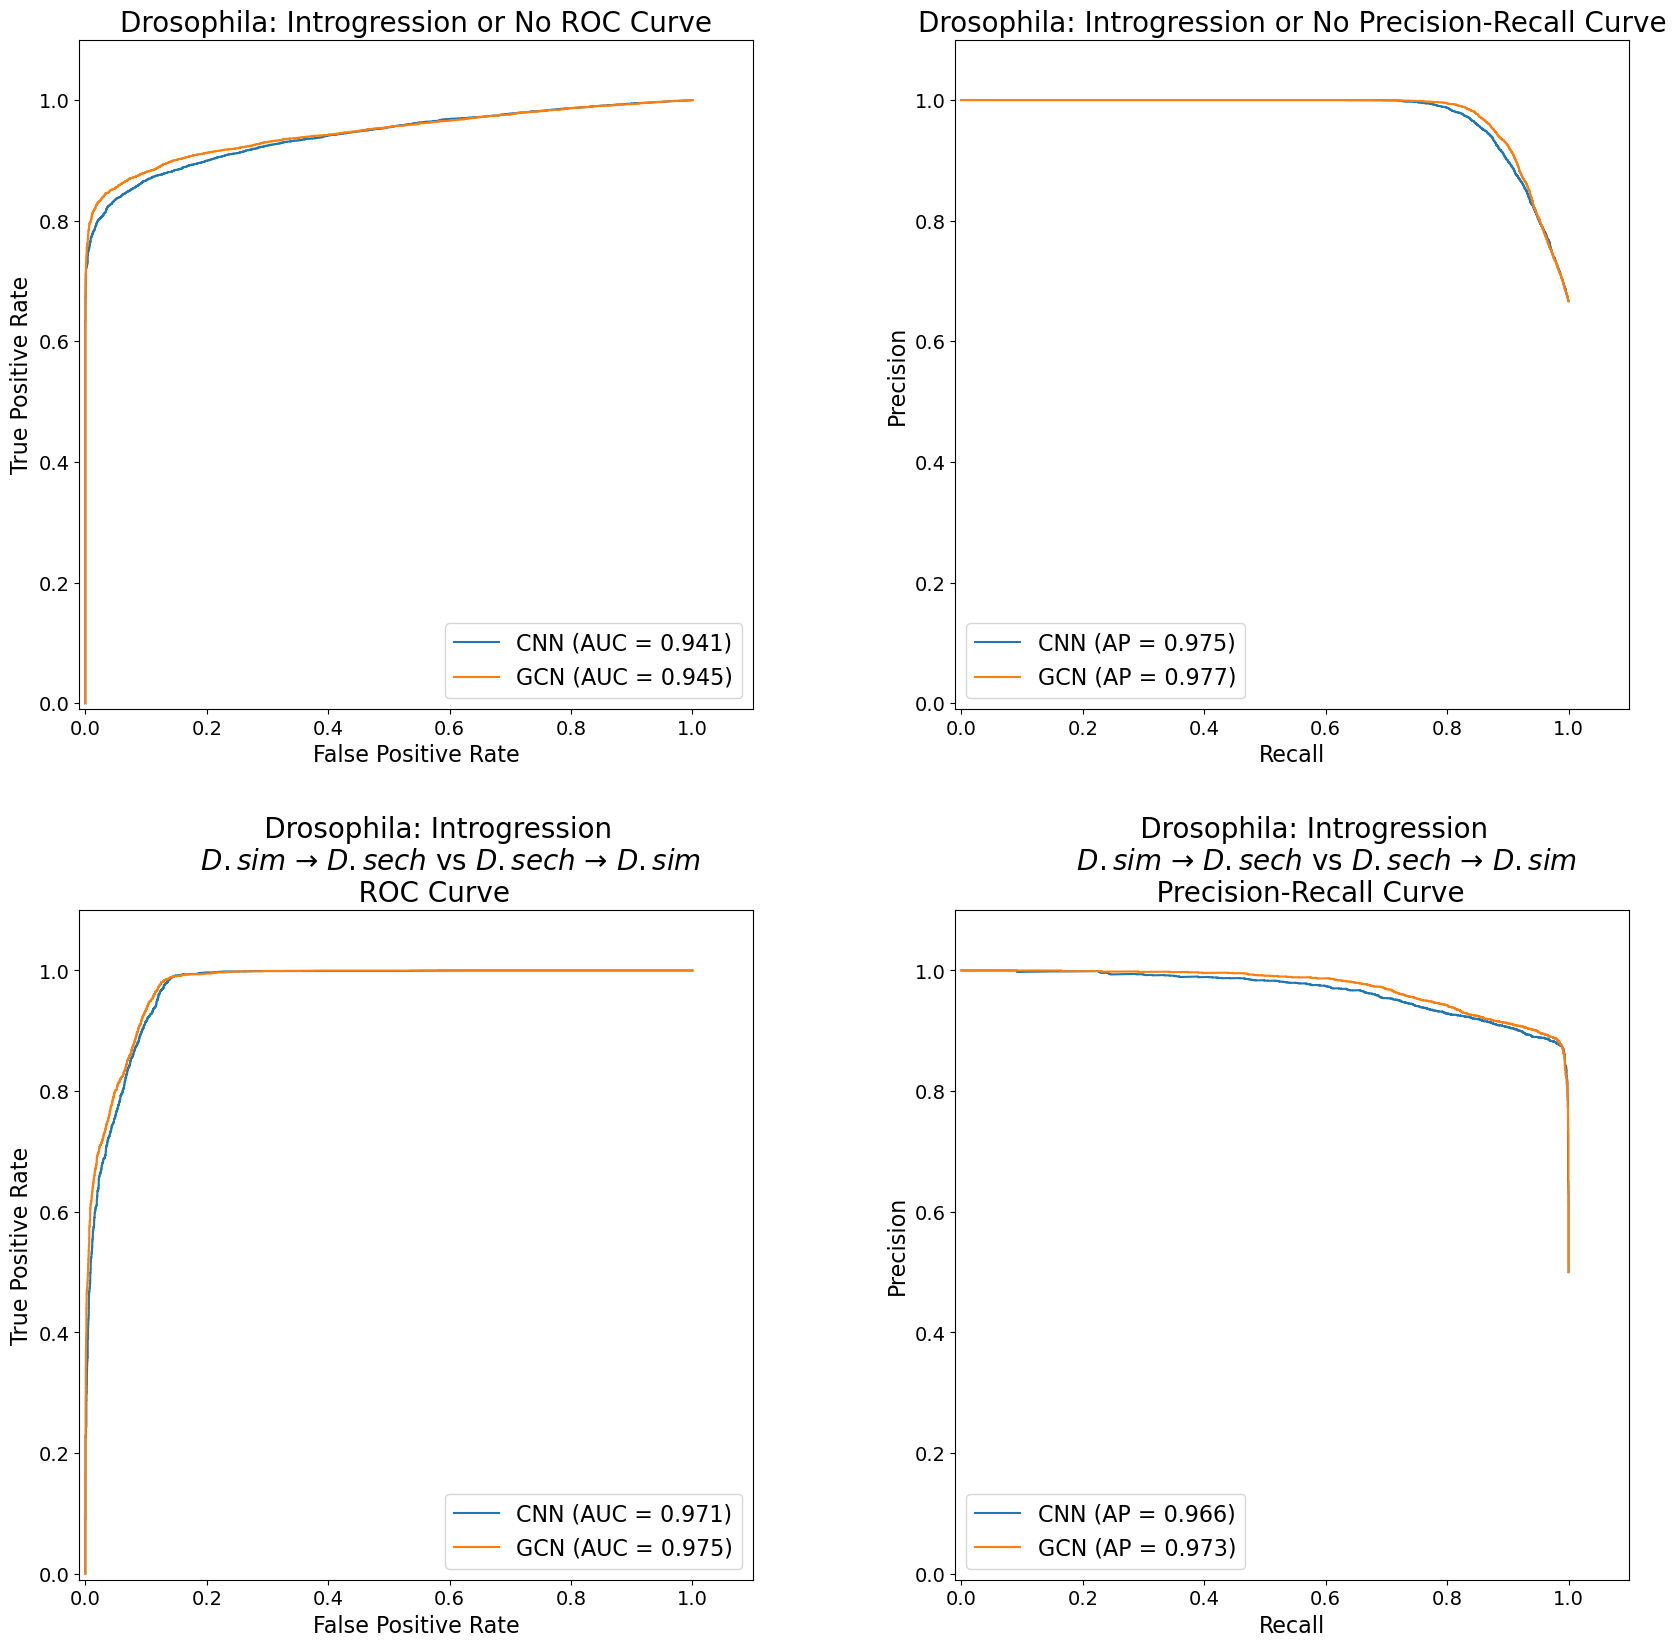

In [7]:
# Dros lineplots
dros = {
    "cnn": pd.read_csv("../data/dros/cnn.csv"),
    "gcn": pd.read_csv("../data/dros/gnn.csv"),
}

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

cnn_intro_probs = np.sum(dros["cnn"].iloc[:, :2].values, axis=1)
gcn_intro_probs = np.sum(dros["gcn"].iloc[:, :2].values, axis=1)

# Binarize labs where 2 is no introgression and 0/1 are introgression
cnn_intro_labs = dros["cnn"]["y"].values
cnn_intro_labs[cnn_intro_labs == 1] = 1
cnn_intro_labs[cnn_intro_labs == 0] = 1
cnn_intro_labs[cnn_intro_labs == 2] = 0

gcn_intro_labs = dros["gcn"]["y"].values
gcn_intro_labs[gcn_intro_labs == 1] = 1
gcn_intro_labs[gcn_intro_labs == 0] = 1
gcn_intro_labs[gcn_intro_labs == 2] = 0

cnn_fpr, cnn_tpr, _ = roc_curve(cnn_intro_labs, cnn_intro_probs)
gcn_fpr, gcn_tpr, _ = roc_curve(gcn_intro_labs, gcn_intro_probs)

cnn_auc = auc(cnn_fpr, cnn_tpr)
gcn_auc = auc(gcn_fpr, gcn_tpr)

ax[0, 0].plot(cnn_fpr, cnn_tpr, label=f"CNN (AUC = {cnn_auc:.3f})")
ax[0, 0].plot(gcn_fpr, gcn_tpr, label=f"GCN (AUC = {gcn_auc:.3f})")
ax[0, 0].set_xlabel("False Positive Rate")
ax[0, 0].set_ylabel("True Positive Rate")
ax[0, 0].set_title("Drosophila: Introgression or No ROC Curve")
ax[0, 0].legend(loc="lower right")

cnn_prec, cnn_rec, _ = precision_recall_curve(cnn_intro_labs, cnn_intro_probs)
gcn_prec, gcn_rec, _ = precision_recall_curve(gcn_intro_labs, gcn_intro_probs)

cnn_ap = average_precision_score(cnn_intro_labs, cnn_intro_probs)
gcn_ap = average_precision_score(gcn_intro_labs, gcn_intro_probs)

ax[0, 1].plot(cnn_rec, cnn_prec, label=f"CNN (AP = {cnn_ap:.3f})")
ax[0, 1].plot(gcn_rec, gcn_prec, label=f"GCN (AP = {gcn_ap:.3f})")
ax[0, 1].set_xlabel("Recall")
ax[0, 1].set_ylabel("Precision")
ax[0, 1].set_title("Drosophila: Introgression or No Precision-Recall Curve")
ax[0, 1].legend(loc="lower left")

# Only ab vs ba, treat lab 0 as positive and 1 as negative
# Subsample only to ab and ba
dros = {
    "cnn": pd.read_csv("../data/dros/cnn.csv"),
    "gcn": pd.read_csv("../data/dros/gnn.csv"),
}

cnn_data = dros["cnn"].loc[dros["cnn"]["y"] != 2]
gcn_data = dros["gcn"].loc[dros["gcn"]["y"] != 2]

cnn_intro_probs = cnn_data["ab"].values
gcn_intro_probs = gcn_data["ab"].values

cnn_intro_labs = cnn_data["y"].values
cnn_intro_labs[cnn_intro_labs == 1] = 3
cnn_intro_labs[cnn_intro_labs == 0] = 1
cnn_intro_labs[cnn_intro_labs == 3] = 0

gcn_intro_labs = gcn_data["y"].values
gcn_intro_labs[gcn_intro_labs == 1] = 3
gcn_intro_labs[gcn_intro_labs == 0] = 1
gcn_intro_labs[gcn_intro_labs == 3] = 0

print(cnn_intro_labs, cnn_intro_probs)

cnn_fpr, cnn_tpr, _ = roc_curve(cnn_intro_labs, cnn_intro_probs)
gcn_fpr, gcn_tpr, _ = roc_curve(gcn_intro_labs, gcn_intro_probs)

cnn_auc = auc(cnn_fpr, cnn_tpr)
gcn_auc = auc(gcn_fpr, gcn_tpr)

ax[1, 0].plot(cnn_fpr, cnn_tpr, label=f"CNN (AUC = {cnn_auc:.3f})")
ax[1, 0].plot(gcn_fpr, gcn_tpr, label=f"GCN (AUC = {gcn_auc:.3f})")
ax[1, 0].set_xlabel("False Positive Rate")
ax[1, 0].set_ylabel("True Positive Rate")
ax[1, 0].set_title(
    """      Drosophila: Introgression 
        $\it{D. sim}$ → $\it{D. sech}$ vs $\it{D. sech}$ → $\it{D. sim}$ 
    ROC Curve"""
)
ax[1, 0].legend(loc="lower right")

cnn_prec, cnn_rec, _ = precision_recall_curve(cnn_intro_labs, cnn_intro_probs)
gcn_prec, gcn_rec, _ = precision_recall_curve(gcn_intro_labs, gcn_intro_probs)

cnn_ap = average_precision_score(cnn_intro_labs, cnn_intro_probs)
gcn_ap = average_precision_score(gcn_intro_labs, gcn_intro_probs)

ax[1, 1].plot(cnn_rec, cnn_prec, label=f"CNN (AP = {cnn_ap:.3f})")
ax[1, 1].plot(gcn_rec, gcn_prec, label=f"GCN (AP = {gcn_ap:.3f})")
ax[1, 1].set_xlabel("Recall")
ax[1, 1].set_ylabel("Precision")
ax[1, 1].set_title(
    """      Drosophila: Introgression 
        $\it{D. sim}$ → $\it{D. sech}$ vs $\it{D. sech}$ → $\it{D. sim}$ 
    Precision-Recall Curve"""
)
ax[1, 1].legend(loc="lower left")

# Adjust scales
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim(-0.01, 1.1)
        ax[i, j].set_ylim(-0.01, 1.1)

# Adjust viewports
plt.subplots_adjust(wspace=0.3, hspace=0.3)


plt.savefig("dros_curves.pdf")
plt.savefig("dros_curves.png", dpi=300)

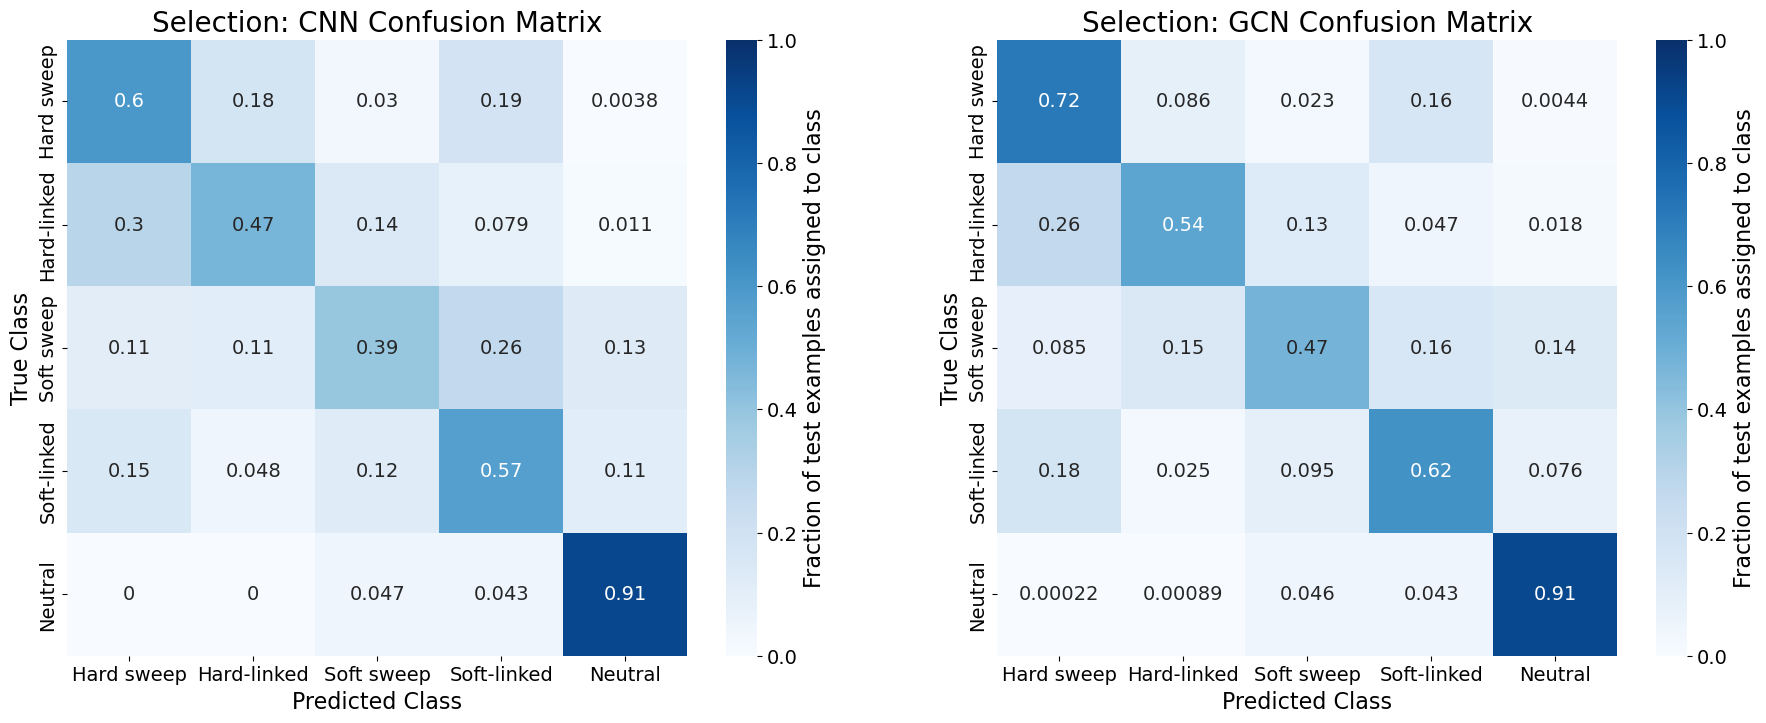

In [5]:
# Seln CMs

"""
Can the labels (and order) of these be Hard sweep, Hard-linked, Soft sweep, Soft-linked, and Neutral?

And can the axis labels be "True class" and "Predicted class"?

Finally, I can haz legend?

"""
og_labels = ["hard", "hard-near", "neutral", "soft", "soft-near"]
seln_labels = {
    "hard": "Hard sweep",
    "hard-near": "Hard-linked",
    "soft": "Soft sweep",
    "soft-near": "Soft-linked",
    "neutral": "Neutral",
}

fig, ax = plt.subplots(1, 2, figsize=(22, 8))
for idx in range(2):
    # Confusion matrices as before
    nn = ["cnn", "gcn"][idx]
    preds = np.argmax(seln[nn].iloc[:, :5], axis=1)
    trues = seln[nn]["y"].values
    confmat = confusion_matrix(trues, preds)
    # Swap confmat to match new labels
    confmat = confmat[[0, 1, 4, 3, 2]][:, [0, 1, 4, 3, 2]]

    # sns.heatmap(confmat, annot=True, fmt="d", cmap="Blues", ax=ax[idx, 0], vmin=0, vmax=4000, xticklabels=seln_labels.values(), yticklabels=seln_labels.values())
    # ax[idx, 0].set_ylabel("True Class")
    # ax[idx, 0].set_xlabel("Predicted Class")
    # ax[idx, 0].set_title(f"Selection: {nn.upper()} Confusion Matrix")

    normed = confmat / confmat.sum(axis=1)
    sns.heatmap(
        normed,
        annot=True,
        cmap="Blues",
        ax=ax[idx],
        xticklabels=seln_labels.values(),
        yticklabels=seln_labels.values(),
        vmin=0.0,
        vmax=1.0,
        cbar_kws={'label': 'Fraction of test examples assigned to class'}
    )
    ax[idx].set_ylabel("True Class")
    ax[idx].set_xlabel("Predicted Class")
    ax[idx].set_title(f"Selection: {nn.upper()} Confusion Matrix")


plt.savefig("seln_cm.pdf")
plt.savefig("seln_cm.png", dpi=300)

In [90]:
seln["cnn"]

,hard,hard-near,neutral,soft,soft-near,y
0,0.145212,0.147796,1.089966e-02,0.431807,0.264285,0
1,0.391027,0.337958,9.198209e-05,0.155371,0.115552,0
2,0.742180,0.163382,5.501134e-07,0.076644,0.017793,0
3,0.562807,0.132944,9.314572e-05,0.234183,0.069974,0
4,0.600645,0.328116,4.734696e-07,0.051541,0.019698,0
...,...,...,...,...,...,...
22545,0.016354,0.016240,4.711501e-01,0.285371,0.210885,4
22546,0.020607,0.009265,2.329784e-02,0.731592,0.215238,4
22547,0.244131,0.273216,9.374575e-04,0.278028,0.203687,4
22548,0.366867,0.403983,2.717693e-06,0.102601,0.126547,4


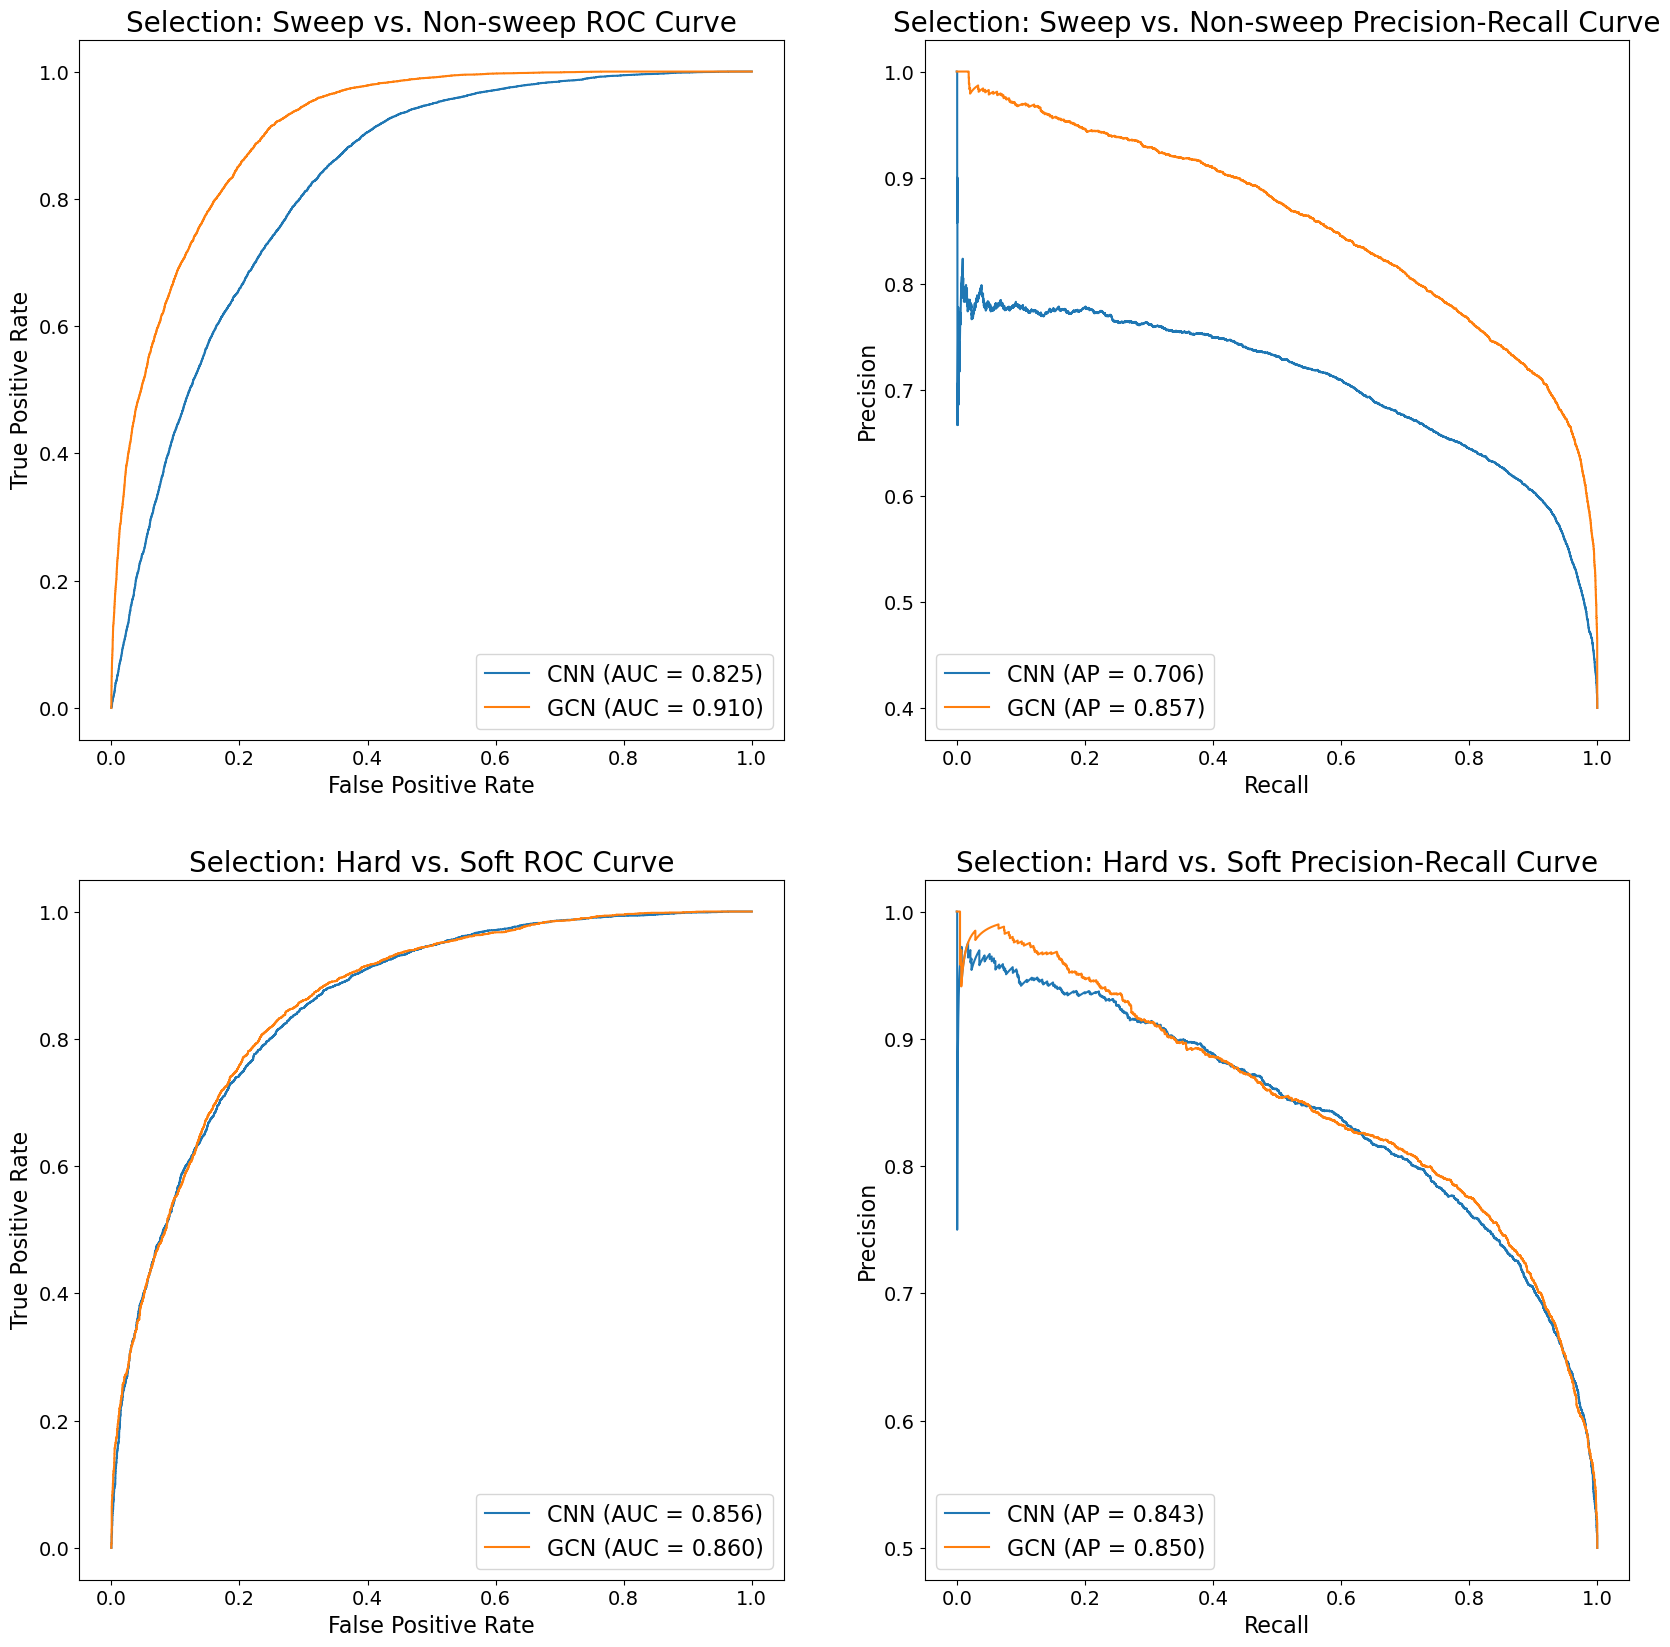

In [91]:
# Selection lineplots
seln = {
    "cnn": pd.read_csv("../data/selection/cnn.csv"),
    "gcn": pd.read_csv("../data/selection/gcn.csv"),
}

"""
1) Have the two columns be Sweep (hard and soft lumped together) vs. Non-sweep (the other three lumped together) and Hard vs. Soft?

2) The rows remain ROC and PR curves as they are now.

3) Then, for each panel, show two curves, one for each method.

4) Note that the insets on the bottom row are messed up

5) Finally, I can haz legend?
"""

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Sweep vs non-sweep
# Set labels of y to 1 if 0,3 or 0 if 1,2,4
cnn_sweep_labs = [0 if i in [1, 2, 4] else 1 for i in seln["cnn"]["y"].values]
gcn_sweep_labs = [0 if i in [1, 2, 4] else 1 for i in seln["gcn"]["y"].values]
cnn_sweep_probs = np.sum(seln["cnn"].iloc[:, [0, 3]].values, axis=1)
gcn_sweep_probs = np.sum(seln["gcn"].iloc[:, [0, 3]].values, axis=1)

cnn_fpr, cnn_tpr, _ = roc_curve(cnn_sweep_labs, cnn_sweep_probs)
gcn_fpr, gcn_tpr, _ = roc_curve(gcn_sweep_labs, gcn_sweep_probs)

cnn_auc = auc(cnn_fpr, cnn_tpr)
gcn_auc = auc(gcn_fpr, gcn_tpr)

ax[0, 0].plot(cnn_fpr, cnn_tpr, label=f"CNN (AUC = {cnn_auc:.3f})")
ax[0, 0].plot(gcn_fpr, gcn_tpr, label=f"GCN (AUC = {gcn_auc:.3f})")
ax[0, 0].set_xlabel("False Positive Rate")
ax[0, 0].set_ylabel("True Positive Rate")
ax[0, 0].set_title("Selection: Sweep vs. Non-sweep ROC Curve")
ax[0, 0].legend(loc="lower right")

cnn_prec, cnn_rec, _ = precision_recall_curve(cnn_sweep_labs, cnn_sweep_probs)
gcn_prec, gcn_rec, _ = precision_recall_curve(gcn_sweep_labs, gcn_sweep_probs)

cnn_ap = average_precision_score(cnn_sweep_labs, cnn_sweep_probs)
gcn_ap = average_precision_score(gcn_sweep_labs, gcn_sweep_probs)

ax[0, 1].plot(cnn_rec, cnn_prec, label=f"CNN (AP = {cnn_ap:.3f})")
ax[0, 1].plot(gcn_rec, gcn_prec, label=f"GCN (AP = {gcn_ap:.3f})")
ax[0, 1].set_xlabel("Recall")
ax[0, 1].set_ylabel("Precision")
ax[0, 1].set_title("Selection: Sweep vs. Non-sweep Precision-Recall Curve")
ax[0, 1].legend(loc="lower left")


# Hard vs soft
# Subset to just hard and soft
cnn_hard_soft_df = seln["cnn"].loc[(seln["cnn"]["y"] == 0) | (seln["cnn"]["y"] == 3)]
gcn_hard_soft_df = seln["gcn"].loc[(seln["gcn"]["y"] == 0) | (seln["gcn"]["y"] == 3)]

cnn_hard_soft_labs = cnn_hard_soft_df["y"].values
cnn_hard_soft_labs[cnn_hard_soft_labs == 0] = 1
cnn_hard_soft_labs[cnn_hard_soft_labs == 3] = 0

gcn_hard_soft_labs = gcn_hard_soft_df["y"].values
gcn_hard_soft_labs[gcn_hard_soft_labs == 0] = 1
gcn_hard_soft_labs[gcn_hard_soft_labs == 3] = 0

cnn_hard_soft_probs = cnn_hard_soft_df["hard"].values
gcn_hard_soft_probs = gcn_hard_soft_df["hard"].values

cnn_fpr, cnn_tpr, _ = roc_curve(cnn_hard_soft_labs, cnn_hard_soft_probs)
gcn_fpr, gcn_tpr, _ = roc_curve(gcn_hard_soft_labs, gcn_hard_soft_probs)

cnn_auc = auc(cnn_fpr, cnn_tpr)
gcn_auc = auc(gcn_fpr, gcn_tpr)

ax[1, 0].plot(cnn_fpr, cnn_tpr, label=f"CNN (AUC = {cnn_auc:.3f})")
ax[1, 0].plot(gcn_fpr, gcn_tpr, label=f"GCN (AUC = {gcn_auc:.3f})")
ax[1, 0].set_xlabel("False Positive Rate")
ax[1, 0].set_ylabel("True Positive Rate")
ax[1, 0].set_title("Selection: Hard vs. Soft ROC Curve")
ax[1, 0].legend(loc="lower right")

cnn_prec, cnn_rec, _ = precision_recall_curve(cnn_hard_soft_labs, cnn_hard_soft_probs)
gcn_prec, gcn_rec, _ = precision_recall_curve(gcn_hard_soft_labs, gcn_hard_soft_probs)

cnn_ap = average_precision_score(cnn_hard_soft_labs, cnn_hard_soft_probs)
gcn_ap = average_precision_score(gcn_hard_soft_labs, gcn_hard_soft_probs)

ax[1, 1].plot(cnn_rec, cnn_prec, label=f"CNN (AP = {cnn_ap:.3f})")
ax[1, 1].plot(gcn_rec, gcn_prec, label=f"GCN (AP = {gcn_ap:.3f})")
ax[1, 1].set_xlabel("Recall")
ax[1, 1].set_ylabel("Precision")
ax[1, 1].set_title("Selection: Hard vs. Soft Precision-Recall Curve")
ax[1, 1].legend(loc="lower left")


plt.savefig("seln_curves.pdf")
plt.savefig("seln_curves.png", dpi=300)

In [92]:
recomb["cnn"]["y_pred"].shape

(9717, 1)

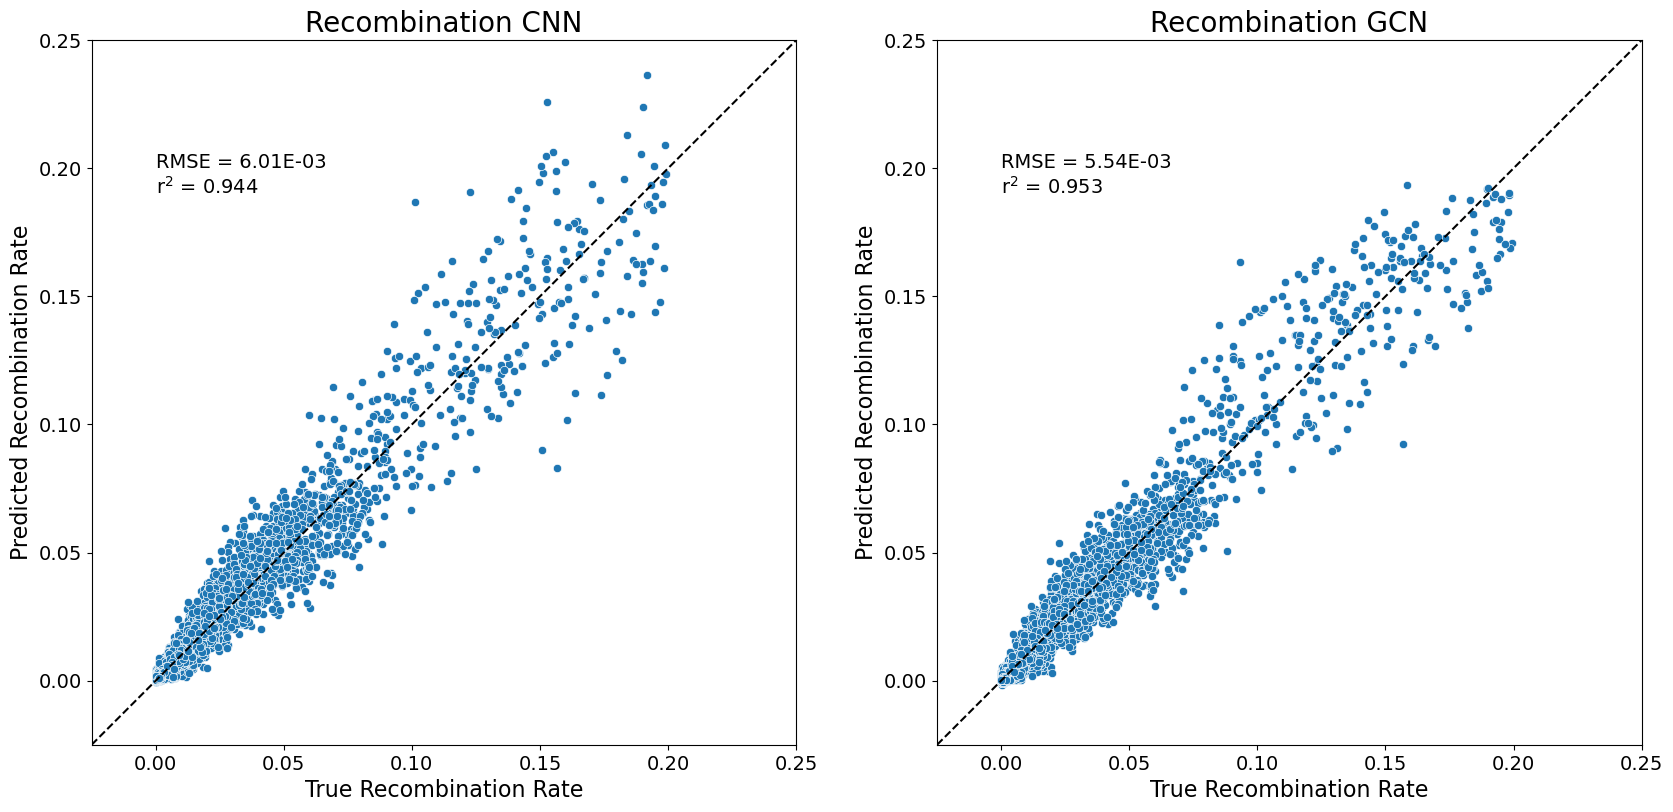

In [14]:
from sklearn.metrics import r2_score

# Scatterplot of recom with diagonal
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for idx in range(2):
    nn = ["cnn", "gcn"][idx]
    y_data = recomb[nn]["y"].flatten()
    y_pred = recomb[nn]["y_pred"].flatten()
    rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))
    sns.scatterplot(x=y_data, y=y_pred, ax=ax[idx])
    ax[idx].set_xlabel("True Recombination Rate")
    ax[idx].set_ylabel("Predicted Recombination Rate")
    ax[idx].set_title(f"Recombination {nn.upper()}")
    ax[idx].set_xlim([-0.025, 0.25])
    ax[idx].set_ylim([-0.025, 0.25])

    # Diagonal
    ax[idx].plot([-0.025, 0.25], [-0.025, 0.25], color="black", linestyle="--")
    ax[idx].plot([], color="black", linestyle="--")
    ax[idx].annotate("RMSE = {:.2E}".format(rmse), (0, 0.2))
    ax[idx].annotate("$r^2$ = {:.3}".format(r2_score(y_data, y_pred)), (0, 0.19))
    ax[idx].set_aspect("equal", "box")


plt.savefig("recom_scatter.pdf")
plt.savefig("recom_scatter.png", dpi=300)

In [94]:
recomb["cnn"]["y_pred"]

array([[0.00481839],
       [0.03732422],
       [0.00143768],
       ...,
       [0.0098883 ],
       [0.01855428],
       [0.00122151]], dtype=float32)

<>:22: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:25: SyntaxWarning: invalid escape sequence '\i'
<>:26: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:25: SyntaxWarning: invalid escape sequence '\i'
<>:26: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_62965/768904222.py:22: SyntaxWarning: invalid escape sequence '\i'
  "log($\it{Ne_0}$)",
/tmp/ipykernel_62965/768904222.py:23: SyntaxWarning: invalid escape sequence '\i'
  "log($\it{T_1}$)",
/tmp/ipykernel_62965/768904222.py:24: SyntaxWarning: invalid escape sequence '\i'
  "log($\it{Ne_1}$)",
/tmp/ipykernel_62965/768904222.py:25: SyntaxWarning: invalid escape sequence '\i'
  "log($\it{T_2}$)",
/tmp/ipykernel_62965/768904222.py:26: SyntaxWarning: invalid escape sequence

(7998, 5)


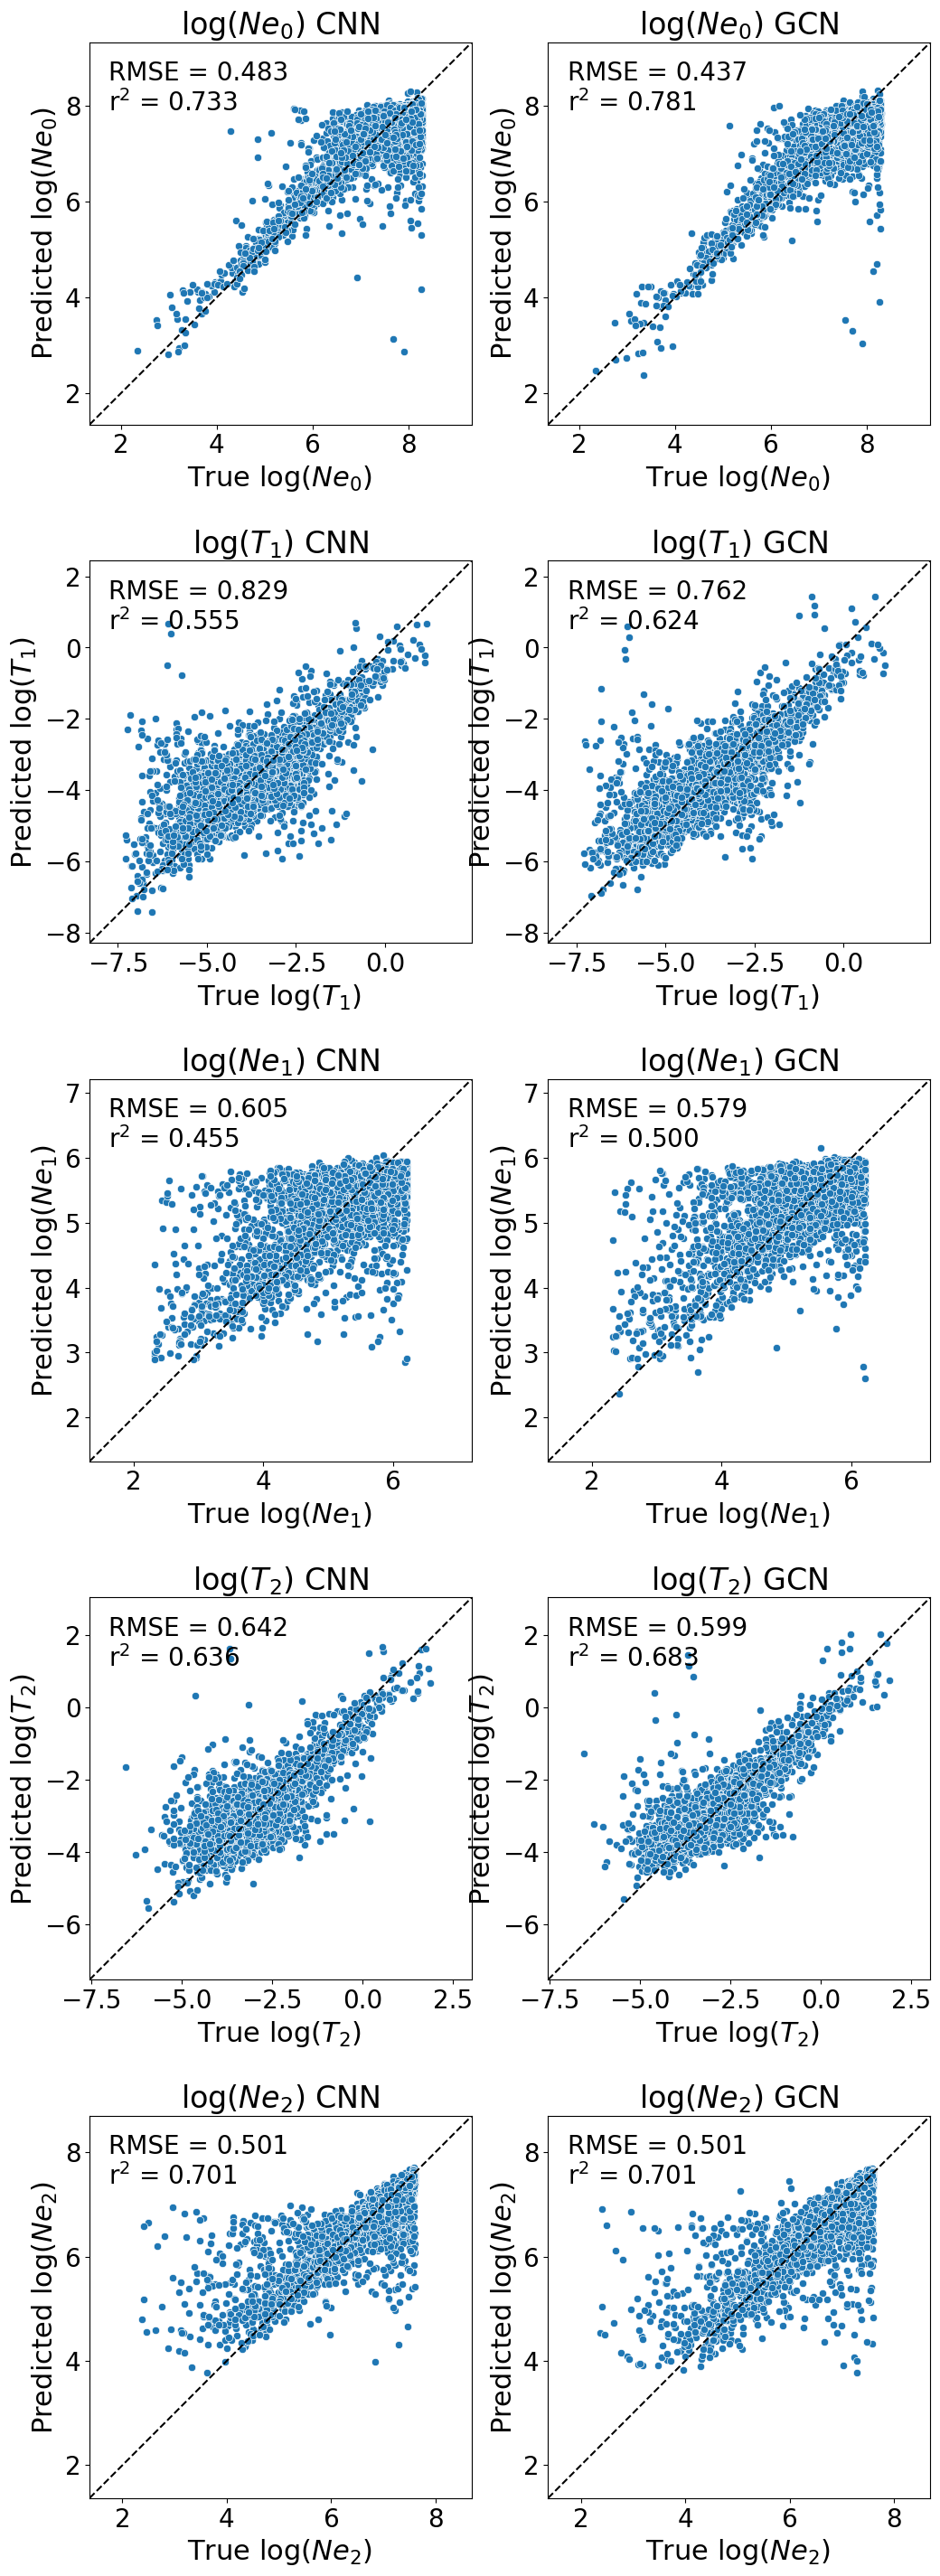

In [42]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {"mathtext.default": "regular"}

plt.rcParams.update(params)

# Scatterplot of demo with diagonal
fig, ax = plt.subplots(5, 2, figsize=(12, 36))

# Latex for Ne sub 0
titles = [
    "log($\it{Ne_0}$)",
    "log($\it{T_1}$)",
    "log($\it{Ne_1}$)",
    "log($\it{T_2}$)",
    "log($\it{Ne_2}$)",
]
y_all = np.concatenate((demo["cnn"]["y"], demo["gcn"]["y_pred"]), axis=0)
print(y_all.shape)
mins = np.min(y_all, axis=0) - 1
maxs = np.max(y_all, axis=0) + 1

for t in range(len(titles)):
    for idx in range(2):
        nn = ["cnn", "gcn"][idx]

        y_data = demo[nn]["y"][:, t]
        y_pred = demo[nn]["y_pred"][:, t]
        r2 = r2_score(y_data, y_pred)
        rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))

        sns.scatterplot(x=y_data, y=y_pred, ax=ax[t, idx])

        ax[t, idx].set_xlabel(f"True {titles[t]} ")
        ax[t, idx].set_ylabel(f"Predicted {titles[t]}")
        ax[t, idx].set_title(f"{titles[t]} {nn.upper()}")
        ax[t, idx].set_xlim(mins[t], maxs[t])
        ax[t, idx].set_ylim(mins[t], maxs[t])
        ax[t, idx].plot(
            [0, 1],
            [0, 1],
            transform=ax[t, idx].transAxes,
            color="black",
            linestyle="--",
        )

        ax[t, idx].annotate(
            "RMSE = {:.3f}".format(rmse), xy=(0.05, 0.9), xycoords="axes fraction")
        ax[t, idx].annotate("$r^2$ = {:.3f}".format(r2),  xy=(0.05, 0.82), xycoords="axes fraction")

        ax[t, idx].set_aspect("equal", "box")


plt.savefig("demo_scatter.pdf")
plt.savefig("demo_scatter.png", dpi=300)